# Unfixed Linear Regression with SGD

This notebook evaluates convergence behavior and generalization performance of SGD on synthetic linear data with randomly generated coefficients. We compare our three stepsize strategies — fixed, halving, and diminishing — using both training and test error over 20 randomized trials.


In [7]:
import sys
sys.path.append("..") 

import numpy as np
import matplotlib.pyplot as plt
from SGD.sgd import SGD
from data.generate_synthetic_data import generate_training_data_unfixed
from sklearn.model_selection import train_test_split

### Summary of Train/Test Error Over 20 Runs

We generate new synthetic data each time and report mean ± std of final losses.

In [ ]:
n_runs = 20
train_losses = {"fixed": [], "halving": [], "diminishing": []}
test_losses = {"fixed": [], "halving": [], "diminishing": []}

for run in range(n_runs):
    X, y, _ = generate_training_data_unfixed(m=500, n=2, noise=0.01, model_type='linear')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    for method in ["fixed", "halving", "diminishing"]:
        sgd = SGD(X_train, y_train, num_iterations=5000, noise=0.01)
        w, obj, grad, dist = sgd.optimize(stepsize_type=method)
        # Compute and store training loss
        train_losses[method].append(obj[-1])
        # Compute and store test loss
        X_test_model = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
        test_pred = X_test_model @ w
        test_loss = np.mean((test_pred - y_test) ** 2)
        test_losses[method].append(test_loss)

# --- Print summary
for method in ["fixed", "halving", "diminishing"]:
    print(f"\n{method.capitalize()} Results:")
    print(f"  Train Loss  - Mean: {np.mean(train_losses[method]):.4f}, Std: {np.std(train_losses[method]):.4f}")
    print(f"  Test Loss   - Mean: {np.mean(test_losses[method]):.4f}, Std: {np.std(test_losses[method]):.4f}")


Fixed Results:
  Train Loss  - Mean: 0.0382, Std: 0.0843
  Test Loss   - Mean: 0.0790, Std: 0.1665

Halving Results:
  Train Loss  - Mean: 0.0371, Std: 0.0804
  Test Loss   - Mean: 0.0768, Std: 0.1591

Diminishing Results:
  Train Loss  - Mean: 0.0424, Std: 0.0898
  Test Loss   - Mean: 0.0877, Std: 0.1786


### Convergence Plots (Single Run)

Here, we show the distance to optimum, gradient norm, and suboptimality gap over 5000 iterations on one synthetic dataset.

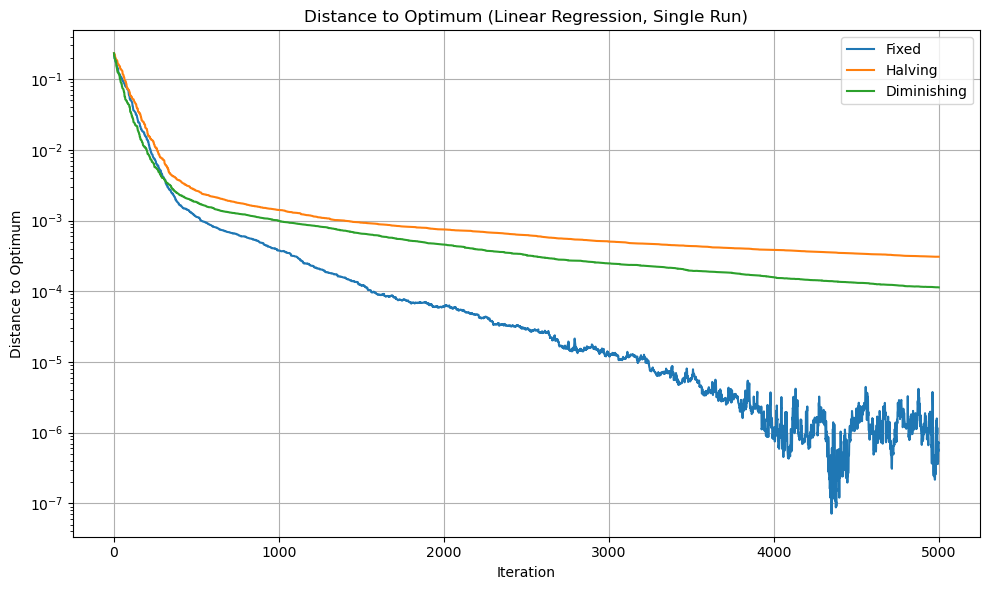

In [ ]:
X, y, true_params = generate_training_data_unfixed(m=500, n=2, noise=0.01, model_type='linear')
sgd = SGD(X, y, num_iterations=5000, noise=0.01)

results = {}
for method in ["fixed", "halving", "diminishing"]:
    w, obj, grad, dist = sgd.optimize(stepsize_type=method)
    results[method] = {
        "w": w,
        "obj": obj,
        "grad": grad,
        "dist": dist
    }

# Plot: Distance to optimum vs. iteration
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["dist"], label=method.capitalize())
plt.xlabel("Iteration")
plt.ylabel("Distance to Optimum")
plt.yscale("log")
plt.title("Distance to Optimum (Linear Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

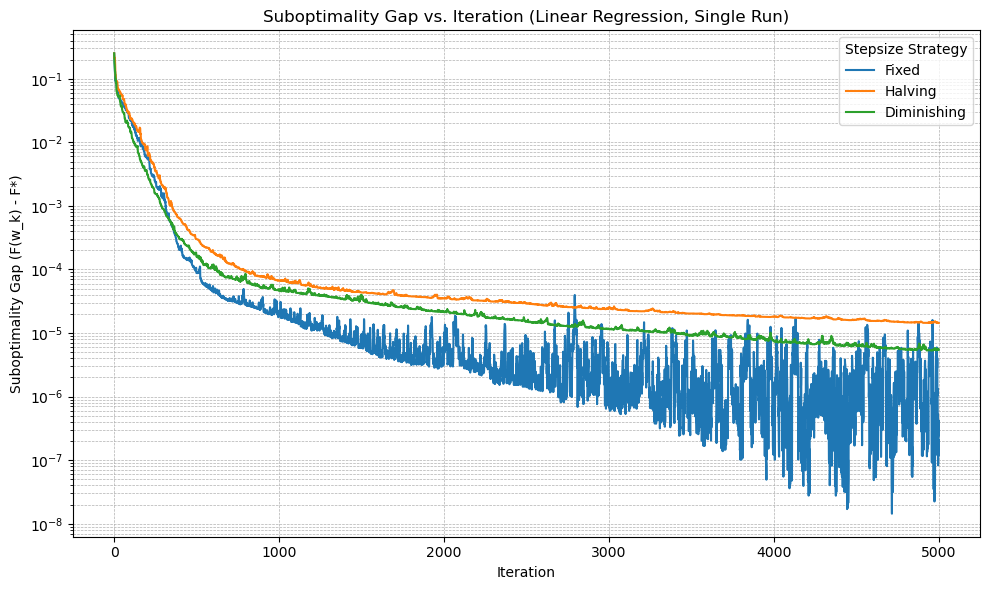

In [10]:
plt.figure(figsize=(10, 6))
plt.yscale("log")

for method in results:
    subopt_gap = results[method]["obj"] - sgd.F_star
    plt.plot(subopt_gap, label=method.capitalize())

plt.xlabel("Iteration")
plt.ylabel("Suboptimality Gap (F(w_k) - F*)")
plt.title("Suboptimality Gap vs. Iteration (Linear Regression, Single Run)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Stepsize Strategy")
plt.tight_layout()
plt.show()

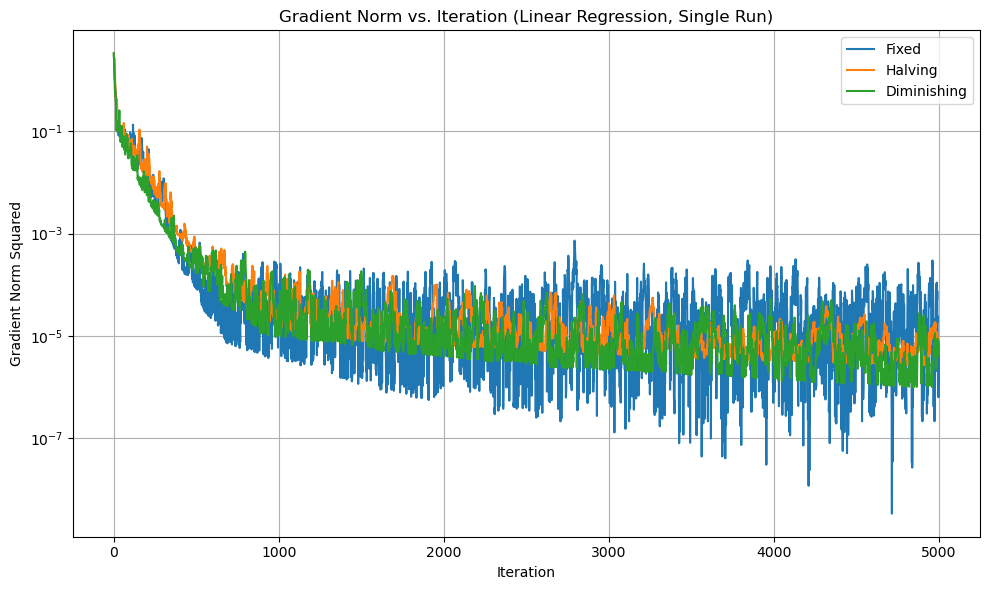

In [11]:
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["grad"], label=method.capitalize())  
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm Squared")
plt.yscale("log")
plt.title("Gradient Norm vs. Iteration (Linear Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Theoretical Constants

The following constants were computed from the problem to derive the various stepsizes.

In [12]:
print("SGD Parameters for Unfixed Linear Run:")
print("="*60)
print(f"L (Lipschitz constant): {sgd.L:.4f}")
print(f"c: {sgd.c:.4f}")
print(f"M_G: {sgd.M_G:.4f}")
print(f"M: {sgd.M:.4f}")
print(f"M_V: {sgd.M_V:.4f}")
print(f"mu: {sgd.mu:.4f}")
print(f"mu_G: {sgd.mu_G:.4f}")
print(f"Diminishing stepsize (beta): {sgd.beta:.6f}")
print(f"Diminishing stepsize (gama): {sgd.gamma:.6f} \n")
print(f"Fixed stepsize (alpha): {sgd.fixed_alpha:.6f}")

print("\n" + "="*60)
print("True Parameters (used to generate synthetic data):")
print(f"A: {true_params['A']}")
print(f"b: {true_params['b']}")

print("\nLearned Parameters from Each Stepsize Strategy:")
print("-" * 60)
for method in results:
    w_method = results[method]["w"]
    print(f"{method.capitalize()} stepsize:")
    print(f"  Bias term (w_0): {w_method[0]:.4f}")
    print(f"  Weights (w_1,w_2: {w_method[1:]}")

SGD Parameters for Unfixed Linear Run:
L (Lipschitz constant): 9.3146
c: 0.0927
M_G: 11.4221
M: 0.0010
M_V: 10.4221
mu: 1.0000
mu_G: 1.0000
Diminishing stepsize (beta): 10.799137
Diminishing stepsize (gama): 1147.944812 

Fixed stepsize (alpha): 0.009399

True Parameters (used to generate synthetic data):
A: [-0.43632532  0.20173992]
b: -0.013705795698440024

Learned Parameters from Each Stepsize Strategy:
------------------------------------------------------------
Fixed stepsize:
  Bias term (w_0): -0.0145
  Weights (w_1,w_2: [-0.43718393  0.20317055]
Halving stepsize:
  Bias term (w_0): -0.0305
  Weights (w_1,w_2: [-0.43269933  0.20607262]
Diminishing stepsize:
  Bias term (w_0): -0.0239
  Weights (w_1,w_2: [-0.43418475  0.20499002]
